In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import ipywidgets as widgets
from IPython.display import display
# from teaching_tools.widgets import ClusterWidget, SCFClusterWidget

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
dt = pd.read_csv("Mall_Customers.csv")
df = dt.copy()
print(df.head())
print(df.shape)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)


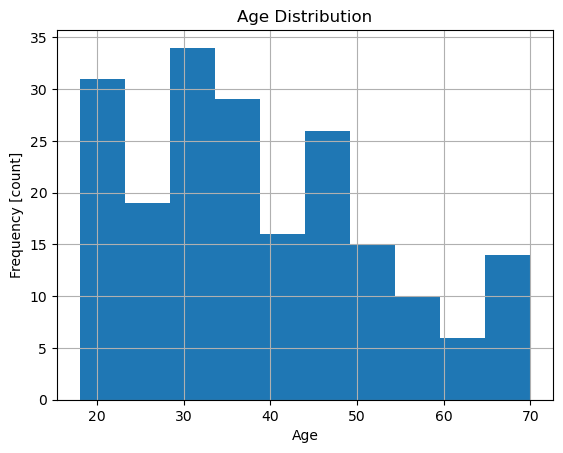

In [4]:
"""Data Exploration"""
# create a histogram of the Age column with 10 bins
df["Age"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency [count]")
plt.title("Age Distribution");


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Define the bins and labels
bins = [0, 24, 34, 44, 54, 64, 74, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

# Create a new column for the age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age Group  
0       <25  
1       <25  
2       <25  
3       <25  
4     25-34  


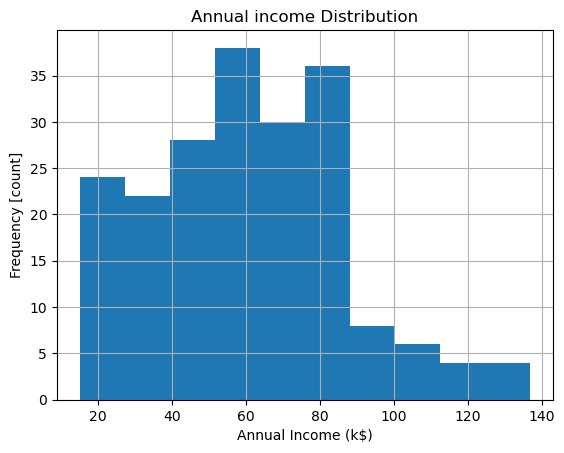

In [7]:
# create a histogram of the Age column with 10 bins
df["Annual Income (k$)"].hist(bins=10)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency [count]")
plt.title("Annual income Distribution");

In [8]:
# Define the bins and labels for Annual Income
income_bins = [0, 20, 39.9, 59.9, 79.9, 89.9, 99.9, 140]
income_labels = ['0-20', '20-39.9', '40-59.9', '60-79.9', '80-89.9', '90-99.9', '100-140']

# Create a new column for income groups
df['Income Group [k$]'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels, right=False)
# df.drop(columns=["Annual Income (k$)", "Income Group", "Age"], inplace=True)
# Display the updated DataFrame
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

    Age Group Income Group [k$]  
0         <25              0-20  
1         <25      

In [9]:
# Define the labels for spending score
spending_bins = [0, 20, 40, 60, 80, 100]
spending_labels = ['0-20', '20-39.9', '40-59.9', '60-79.9', '80-100']

# Create a new column for the income groups
df['Total Spending Score'] = pd.cut(df['Spending Score (1-100)'], bins=spending_bins, labels=spending_labels, right=False)

# Drop columns 
df.drop(columns=["CustomerID"], inplace=True)
# Display the updated DataFrame
print(df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100) Age Group  \
0      Male   19                  15                      39       <25   
1      Male   21                  15                      81       <25   
2    Female   20                  16                       6       <25   
3    Female   23                  16                      77       <25   
4    Female   31                  17                      40     25-34   
..      ...  ...                 ...                     ...       ...   
195  Female   35                 120                      79     35-44   
196  Female   45                 126                      28     45-54   
197    Male   32                 126                      74     25-34   
198    Male   32                 137                      18     25-34   
199    Male   30                 137                      83     25-34   

    Income Group [k$] Total Spending Score  
0                0-20              20-39.9  
1                0-20

In [10]:
"""The above columns have been adjusted for effective communication
The Age columns was labled in classes:
[<25, 25-34, 35-44, 45-54, 55-64, 65-74, >74],

Likewise the Income gropus was created for effecctive communication
[
0-20 -- Very Low Earners
20-39.9 -- Low Earners
40-59.9 -- Moderate Earners
60-79.9 -- Mid-Income Earners        
80-89.9 --High Earners
90-99.9 -- Very High Earners
100-140 -- Wealthy
]

Lastly the Spending scopre were also labelled as written below:
['0-20' : Low Spenders, 
'20-39.9': Moderate Spenders,
'40-59.9' : Mid-Level Spenders, 
'60-79.9': High Spenders, 
'80-100' : Highest spenders]
"""

"The above columns have been adjusted for effective communication\nThe Age columns was labled in classes:\n[<25, 25-34, 35-44, 45-54, 55-64, 65-74, >74],\n\nLikewise the Income gropus was created for effecctive communication\n[\n0-20 -- Very Low Earners\n20-39.9 -- Low Earners\n40-59.9 -- Moderate Earners\n60-79.9 -- Mid-Income Earners        \n80-89.9 --High Earners\n90-99.9 -- Very High Earners\n100-140 -- Wealthy\n]\n\nLastly the Spending scopre were also labelled as written below:\n['0-20' : Low Spenders, \n'20-39.9': Moderate Spenders,\n'40-59.9' : Mid-Level Spenders, \n'60-79.9': High Spenders, \n'80-100' : Highest spenders]\n"

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    object  
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
 4   Age Group               200 non-null    category
 5   Income Group [k$]       200 non-null    category
 6   Total Spending Score    200 non-null    category
dtypes: category(3), int64(3), object(1)
memory usage: 7.9+ KB


In [12]:
# Using pandas to check the correlation of coclumns
cols = df.drop(columns=["Gender", "Total Spending Score", "Age Group", "Income Group [k$]"])
cols.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [13]:
# convert the Annual Income column to thousands to reveal more information
df["Annual Income (k$)"] = df["Annual Income (k$)"] * 1e3
df["Annual Income (k$)"].head()

0    15000.0
1    15000.0
2    16000.0
3    16000.0
4    17000.0
Name: Annual Income (k$), dtype: float64

In [14]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Income Group [k$],Total Spending Score
0,Male,19,15000.0,39,<25,0-20,20-39.9
1,Male,21,15000.0,81,<25,0-20,80-100
2,Female,20,16000.0,6,<25,0-20,0-20
3,Female,23,16000.0,77,<25,0-20,60-79.9
4,Female,31,17000.0,40,25-34,0-20,40-59.9
...,...,...,...,...,...,...,...
195,Female,35,120000.0,79,35-44,100-140,60-79.9
196,Female,45,126000.0,28,45-54,100-140,20-39.9
197,Male,32,126000.0,74,25-34,100-140,60-79.9
198,Male,32,137000.0,18,25-34,100-140,0-20


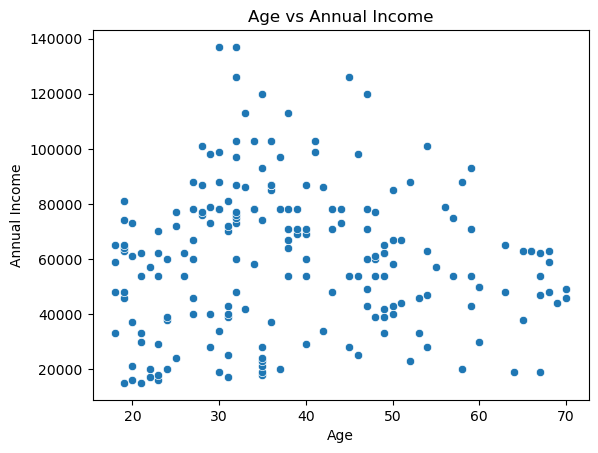

In [15]:
# Check the relation of the Annual income and Age
sns.scatterplot(
    x=df["Age"],
    y=df["Annual Income (k$)"],
)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age vs Annual Income");

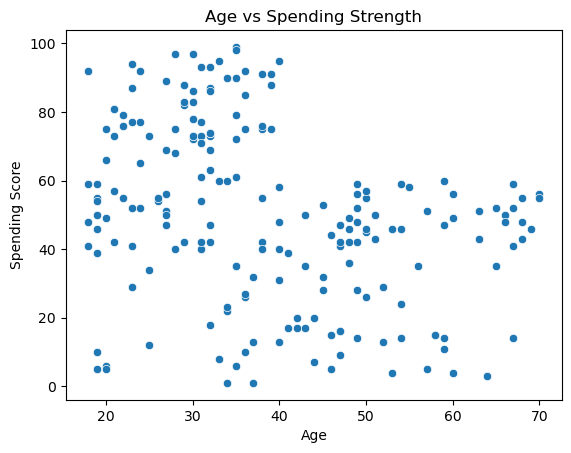

In [16]:
# Check the relation of the Annual income and Age
sns.scatterplot(
    x=df["Age"],
    y=df["Spending Score (1-100)"],
)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age vs Spending Strength");

In [37]:
"""Split Dataset"""
X =  df[["Age", "Spending Score (1-100)"]]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (200, 2)


,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [39]:
"""Build Model"""
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    #Build model
    model = KMeans(n_clusters=k, random_state=42)
    # Train model
    model.fit(X)
    # calculate inertia
    inertia_errors.append(model.inertia_)
    # calculatess
    silhouette_scores.append(silhouette_score(X, model.labels_))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

In [41]:
print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [75949.15601023019, 45840.67661610867, 28165.58356662934, 23838.24882164619, 19483.1179104427, 15514.193134351035, 13006.48362885102, 11738.020296954508, 10173.039478114479, 9470.267440500105, 8759.233190051324]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [0.4692341232501655, 0.45300127016521263, 0.49973941540141753, 0.43350225495428363, 0.4376965763059772, 0.42313509747504796, 0.43215030177487107, 0.41485342159923116, 0.4141899863508767, 0.39306448028767604, 0.3970633657674563]


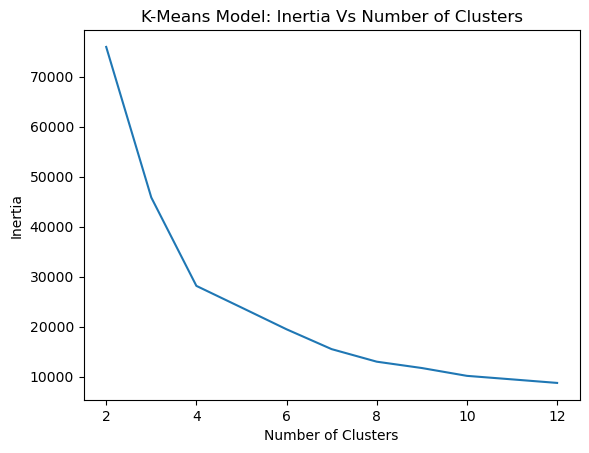

In [43]:
# Plot 'inertia_errors' by 'n_clusters'
plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia Vs Number of Clusters");

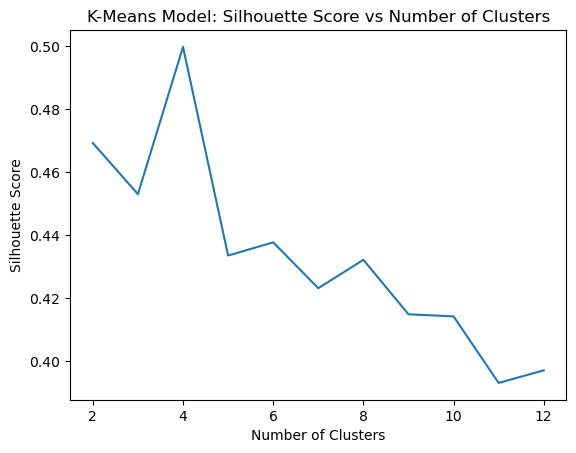

In [45]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters");

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

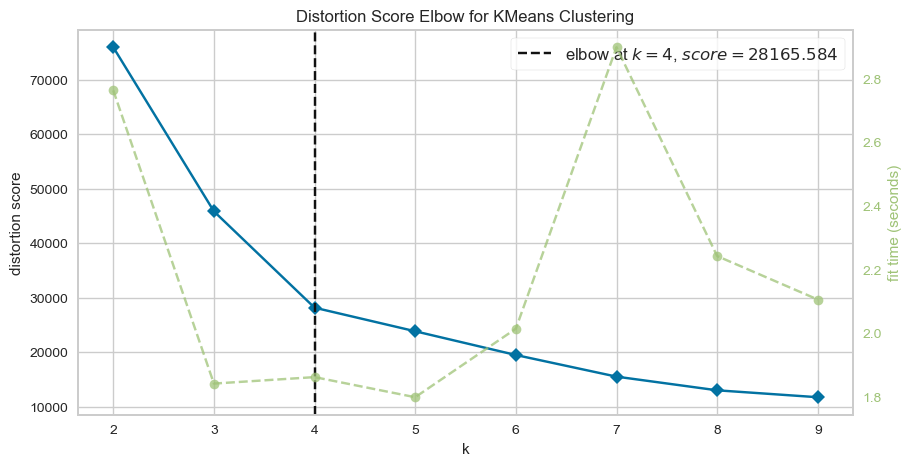

In [54]:
"""
Using the KElbowVisualizer from the 
yellowbrick library to confirm the best 
value for k
"""
from yellowbrick.cluster import KElbowVisualizer

# -------instantiate the clustering model and visualizer
km= KMeans(random_state= 42)
visualizer= KElbowVisualizer(km, k= (2,10))

plt.figure(figsize=(10,5))
visualizer.fit(X)
visualizer.show();

In [58]:
# Build model
model = KMeans(n_clusters=4, random_state=42)
# print("model type:", type(model))

# Fit model to data
model.fit(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [62]:
# Extract  labels from the model
labels = model.labels_
print("labels type:", type(labels))
print("labels shape:", labels.shape)
labels[-10:]

labels type: <class 'numpy.ndarray'>
labels shape: (200,)


array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

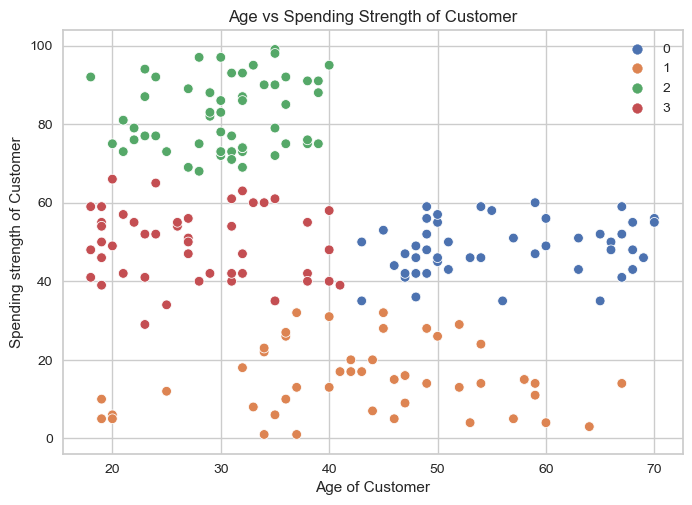

In [84]:
# Plot Age agaisnt the Spending Score with hue=label
sns.scatterplot(
    x=df["Age"],
    y=df["Spending Score (1-100)"],
    hue=labels,
    palette="deep"
)
plt.xlabel("Age of Customer")
plt.ylabel("Spending strength of Customer")
plt.title("Age vs Spending Strength of Customer");

In [ ]:
"""
COMMUNICATION:-
In the end of clustering, we have four group of customers:
[0]: These customers are between the age of 45-50 that spends 
    about 40 - 60 in spending score
    
[1]: These customers are spread along the age bracket and
    spends having <35 spending score

[2]: These customers are below the 40 years of age and 
    are the targeted customers which spends the most >80 spending score sccumulated

[3]: These are customers below the age of 40 also but spends as 
    much as customers in [0] group.
"""

In [86]:
# Extract the Centroids
centroids = model.cluster_centers_
print("centroids type:", type(centroids))
print("centroids shape:", centroids.shape)
centroids

centroids type: <class 'numpy.ndarray'>
centroids shape: (4, 2)


array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

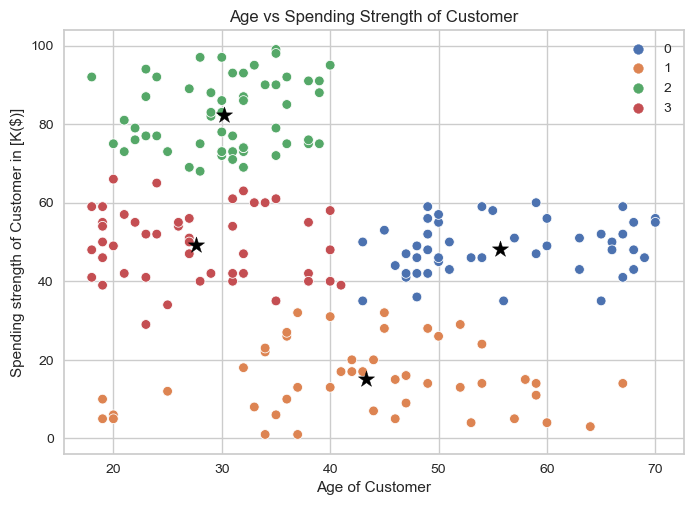

In [88]:
# Plot Age agaisnt the Spending Score with hue=label and Centroids
sns.scatterplot(
    x= df["Age"],
    y=df["Spending Score (1-100)"],
    hue=labels,
    palette="deep"
)
plt.scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    color="black",
    marker="*",
    s=150
)
plt.xlabel("Age of Customer")
plt.ylabel("Spending strength of Customer in [K($)]")
plt.title("Age vs Spending Strength of Customer");

In [ ]:
"""Trying the same process for the 
    [Annual income] & [Spending Score] columns and checking the 
    number of clusters we can also derive from the 
    modelling
"""

In [90]:
"""Split Dataset"""
Y =  df[["Annual Income (k$)", "Spending Score (1-100)"]]

print("X type:", type(Y))
print("X shape:", Y.shape)
Y.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15000.0,39
1,15000.0,81
2,16000.0,6
3,16000.0,77
4,17000.0,40


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

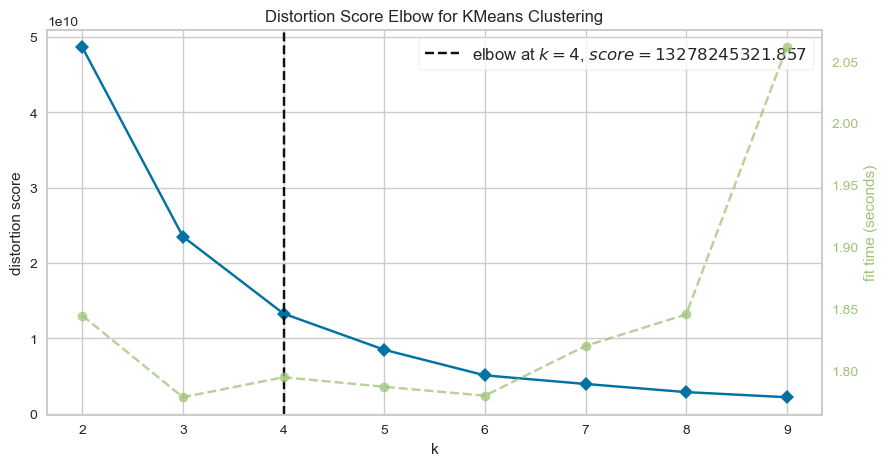

In [95]:
"""Build Model"""
"""
Using the KElbowVisualizer from the 
yellowbrick library to confirm the best 
value for k
"""

# -------instantiate the clustering model and visualizer
km= KMeans(random_state= 42)
visualizer= KElbowVisualizer(km, k= (2,10))

plt.figure(figsize=(10,5))
visualizer.fit(Y)
visualizer.show();

In [97]:
"""The possibilty of the clustering to look
    similar to the initial one that includes
    Age and Spending Score
"""

'The possibilty of the clustering to look\n    similar to the initial one that includes\n    Age and Spending Score\n'

In [99]:
# Build model
model = KMeans(n_clusters=4, random_state=42)
# print("model type:", type(model))

# Fit model to data
model.fit(Y)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

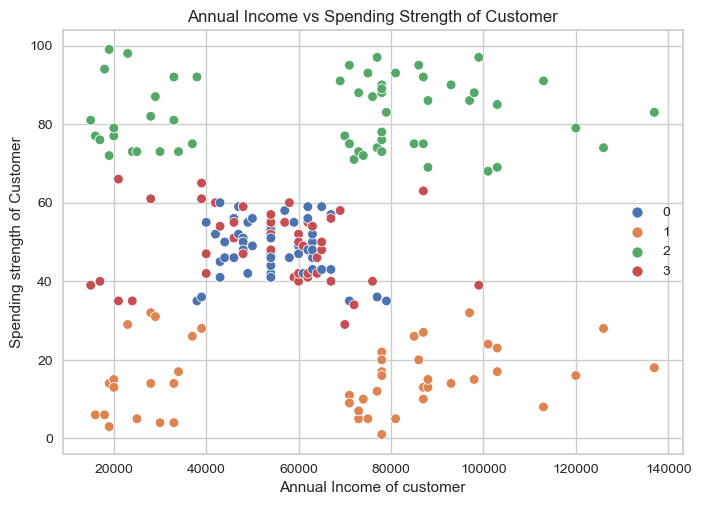

In [105]:
# Plot Age agaisnt the Spending Score with hue=label
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=labels,
    palette="deep"
)
plt.xlabel("Annual Income of customer")
plt.ylabel("Spending strength of Customer")
plt.title("Annual Income vs Spending Strength of Customer");

In [ ]:
"""We cac now draw a conclusion that the model performed
excellently in grouping the dataset into clusters resulting in 
matched output...nevertheless, the best approach to building the model
and getting good clusters is using the [Age] and [Spending Score]
"""